In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key.
from config import weather_api_key
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.


# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sarkand kz
amderma ru
harper lr
kapaa us
yellowknife ca
yellowknife ca
khatanga ru
aswan eg
khatanga ru
beidao cn
victoria sc
taolanaro mg
maumere id
punta arenas cl
velikodvorskiy ru
torbay ca
busselton au
bubaque gw
hilo us
kindu cd
waipawa nz
george za
khatanga ru
albany au
kambove cd
vitoria da conquista br
castro cl
jamestown sh
atuona pf
qaanaaq gl
kapaa us
puerto ayora ec
saldanha za
mataura pf
mount isa au
butaritari ki
codajas br
pisco pe
husavik is
mataura pf
cabo san lucas mx
honningsvag no
illoqqortoormiut gl
marovoay mg
qaanaaq gl
ushuaia ar
ushuaia ar
awjilah ly
albany au
atuona pf
tammisaari fi
vaitupu wf
wad madani sd
bengkulu id
yellowknife ca
kavieng pg
paamiut gl
umzimvubu za
castro cl
bluff nz
dikson ru
dyurtyuli ru
kaitangata nz
punta arenas cl
caranavi bo
the valley ai
rikitea pf
punta arenas cl
mar del plata ar
prince rupert ca
port hedland au
taolanaro mg
ushuaia ar
busselton au
ust-nera ru
ancud cl
san quintin mx
andevoranto mg
hobart au
tuktoyaktuk ca
lebu cl


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | hofn
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | sambava
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | asau
Processing Record 10 of Set 1 | stege
Processing Record 11 of Set 1 | huarmey
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | tete
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | bowen
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | lamar
Processing Record 19 of Set 1 | inongo
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Set 1 | clyde river
Processing Rec

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.79,-50.01,62.02,79,63,7.43,BR,2020-07-07 21:23:39
1,Mount Gambier,-37.83,140.77,39.20,100,90,4.34,AU,2020-07-07 21:25:23
2,Hofn,64.25,-15.21,52.84,75,4,3.87,IS,2020-07-07 21:24:45
3,Punta Arenas,-53.15,-70.92,33.80,80,75,16.11,CL,2020-07-07 21:23:02
4,Port Alfred,-33.59,26.89,55.99,84,54,4.00,ZA,2020-07-07 21:23:12
5,Albany,42.60,-73.97,84.99,55,3,1.99,US,2020-07-07 21:20:09
6,Sambava,-14.27,50.17,73.38,91,96,14.45,MG,2020-07-07 21:25:56
7,Qaanaaq,77.48,-69.36,47.82,54,0,0.83,GL,2020-07-07 21:23:18
8,Asau,46.43,26.40,55.00,85,100,3.87,RO,2020-07-07 21:23:26
9,Stege,54.99,12.28,55.99,75,97,18.52,DK,2020-07-07 21:25:57


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2020-07-07 21:23:39,-24.79,-50.01,62.02,79,63,7.43
1,Mount Gambier,AU,2020-07-07 21:25:23,-37.83,140.77,39.20,100,90,4.34
2,Hofn,IS,2020-07-07 21:24:45,64.25,-15.21,52.84,75,4,3.87
3,Punta Arenas,CL,2020-07-07 21:23:02,-53.15,-70.92,33.80,80,75,16.11
4,Port Alfred,ZA,2020-07-07 21:23:12,-33.59,26.89,55.99,84,54,4.00
...,...,...,...,...,...,...,...,...,...
564,Vostok,RU,2020-07-07 21:28:32,46.49,135.88,57.65,100,100,1.28
565,Half Moon Bay,US,2020-07-07 21:23:00,37.46,-122.43,81.00,46,5,10.29
566,Chama,CH,2020-07-07 21:28:33,47.18,8.46,62.60,63,22,2.80
567,Pevek,RU,2020-07-07 21:23:43,69.70,170.31,44.49,73,53,5.50


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1594157314.2964532

In [27]:
today = time.strftime("%x")
today 

'07/07/20'

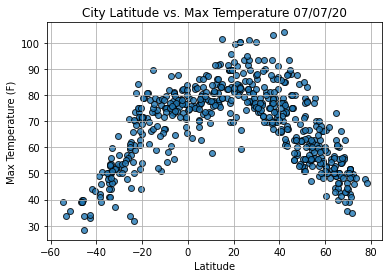

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

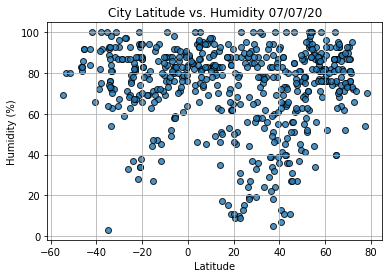

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

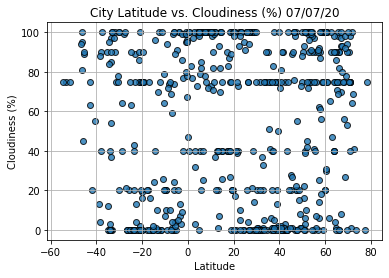

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

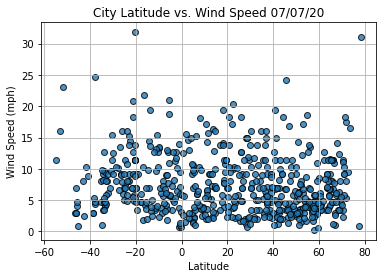

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()